In [1]:
# imports 
%matplotlib inline
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"coordinates.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,index,x,y,z,r,theta
0,0,91.224273,5.561120,413.163104,91.393621,12.627256
1,1,60.192556,69.571079,409.859425,91.996080,7.140732
2,2,41.870173,70.167348,347.978880,81.710269,26.165534
3,3,-10.459361,-95.177651,351.631846,95.750632,23.452491
4,4,-82.607008,-47.182879,352.361318,95.132233,3.660546


In [4]:
# fit the data to a polynomial function
y = df['z'].to_numpy()
x = np.asarray(list(range(500)))

In [5]:
ypreads = np.polyfit(x, y, 9)

In [6]:
print(ypreads)

[ 6.04032732e-20 -1.07356810e-16  7.55629751e-14 -2.73222808e-11
  5.95938861e-09 -1.10906353e-06  2.26001526e-04 -3.39949361e-02
  2.08739132e+00  3.63118088e+02]


In [7]:
ypoly = np.poly1d(ypreads)

In [8]:
myline = np.linspace(0, 499, 250)
line_plt = ypoly(myline)

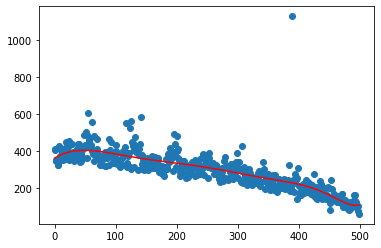

In [9]:
plt.scatter(x, y)
plt.plot(myline, line_plt, "r-")
plt.show() 

In [31]:
newYs = []

for x_val, y_val in zip(x.tolist(), y.tolist()):
    ypread = ypoly(x_val)
    difference = np.abs(y_val - ypread)
    if (difference >= 450):
        newYs.append(ypread)
    else:
        newYs.append(y_val)

TypeError: 'float' object is not iterable

ValueError: x and y must be the same size

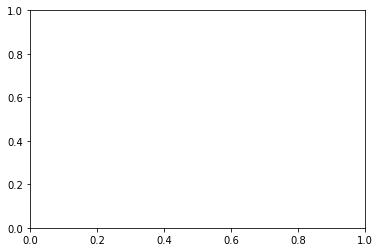

In [27]:
plt.scatter(x, newYs)
plt.plot(myline, line_plt, "r-")
plt.show() 

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


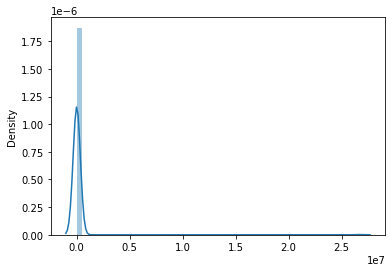

In [11]:
# make a hist plot of the thing 
ax = sns.distplot(differences)

In [17]:
print(np.median(differences))

111.48328722840202


In [20]:
df['newYs'] = newYs

In [26]:
print(max(newYs))

26657146.495810535


In [21]:
df.head()

,index,x,y,z,r,theta,newYs
0,0,91.224273,5.561120,413.163104,91.393621,12.627256,413.163104
1,1,60.192556,69.571079,409.859425,91.996080,7.140732,409.859425
2,2,41.870173,70.167348,347.978880,81.710269,26.165534,347.978880
3,3,-10.459361,-95.177651,351.631846,95.750632,23.452491,351.631846
4,4,-82.607008,-47.182879,352.361318,95.132233,3.660546,352.361318


In [22]:
df['newYs_flipped'] =480 - df['newYs'] 

In [23]:
df.head()

,index,x,y,z,r,theta,newYs,newYs_flipped
0,0,91.224273,5.561120,413.163104,91.393621,12.627256,413.163104,66.836896
1,1,60.192556,69.571079,409.859425,91.996080,7.140732,409.859425,70.140575
2,2,41.870173,70.167348,347.978880,81.710269,26.165534,347.978880,132.021120
3,3,-10.459361,-95.177651,351.631846,95.750632,23.452491,351.631846,128.368154
4,4,-82.607008,-47.182879,352.361318,95.132233,3.660546,352.361318,127.638682


In [25]:
with open('coords_mattForm_adjusted.txt', 'w') as f:
    for index, row in df.iterrows():
        x = row['x']
        y = row['y']
        z = row['newYs_flipped']
        line = f"[{x}, {y}, {z}] \n"
        f.write(line)